<a href="https://colab.research.google.com/github/politeles/audio_classification/blob/main/VADSAudioClassifierEval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation of the audio classifier
In this notebook we will load the previously trained classifier and evaluate using a confussion matrix

In [ ]:
!pip install datasets[audio]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.1 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 19.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 19.0.0 which is incompatible.


In [ ]:
pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-5i29pybk
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-5i29pybk
  Resolved https://github.com/huggingface/transformers to commit e284c7e954abe12c34b50461c17f8115a0afe115
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.3 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.49.0.dev0-py3-none-any.whl size=10627930 sha256=0a207183e6a8d2e1035c9c38f6338a006f73e94cd041eff9933215af1ae615e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-aqadm866/wheels/c0/14/d6/6c9a5582d2ac191ec0a483be151a4495fe1eb2a6706ca49f1b
Successfully built transformers
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully 

In [ ]:
import os
from google.colab import userdata
# Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
# vars as appropriate for your system.
os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")

MessageError: Error: User cancelled dialog

In [ ]:
from transformers import pipeline

pipe = pipeline(
    "audio-classification", model="politeles/distilhubert-finetuned-gtzan"
)

config.json:   0%|          | 0.00/1.90k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/94.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
def classify_audio(filepath):
    preds = pipe(filepath)
    outputs = {}
    for p in preds:
        outputs[p["label"]] = p["score"]
    return outputs

In [ ]:
from datasets import load_dataset

In [ ]:
vads = load_dataset("politeles/vads")

README.md:   0%|          | 0.00/4.90k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/227M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2515 [00:00<?, ? examples/s]

In [ ]:
id2label_fn = vads["train"].features['technique'].int2str

In [ ]:
def custom_postprocessing(outputs):
    """
    Custom post-processing function to apply argmax logic.

    Args:
        outputs: The raw output from the model.

    Returns:
        A dictionary with the predicted label and its score.
    """
    best_label = max(outputs, key=lambda x: x['score'])['label']
    print(best_label)
    return {'label': best_label}

In [ ]:
prediction_pipe = pipeline(
    "audio-classification", model="politeles/distilhubert-finetuned-gtzan",
)

Device set to use cuda:0


In [ ]:
from transformers.pipelines.pt_utils import KeyDataset

In [ ]:
vads["train"]["audio"][0]

{'path': 'bariolage1_sample-0.wav',
 'array': array([-0.01071167, -0.01193237, -0.01132202, ...,  0.0479126 ,
        -0.03659058, -0.10913086]),
 'sampling_rate': 48000}

In [ ]:
# Shuffle the dataset and select the first 100 samples
sampled_dataset = vads["train"].shuffle(seed=42).select(range(500))

In [ ]:
sampled_dataset[0]['audio']

{'path': 'GstrBb3_sample-0.wav',
 'array': array([-1.22070312e-04,  3.05175781e-05, -1.52587891e-04, ...,
         4.24194336e-03,  9.39941406e-03,  1.69982910e-02]),
 'sampling_rate': 48000}

In [ ]:
from tqdm.auto import tqdm

In [ ]:
result = []
for out in tqdm(prediction_pipe(KeyDataset(sampled_dataset, "audio"))):
    result.append(max(out, key=lambda x: x['score'])['label'])
    print(out)
result

  0%|          | 0/500 [00:00<?, ?it/s]

[{'score': 0.9395822286605835, 'label': 'sulponticello'}, {'score': 0.023305857554078102, 'label': 'legato'}, {'score': 0.015705760568380356, 'label': 'doublestops'}, {'score': 0.0073311845771968365, 'label': 'ricochet'}, {'score': 0.0032455208711326122, 'label': 'chords'}]
[{'score': 0.9778900742530823, 'label': 'pizz'}, {'score': 0.004300644621253014, 'label': 'chords'}, {'score': 0.00428534671664238, 'label': 'spicatto'}, {'score': 0.0035769883543252945, 'label': 'legato'}, {'score': 0.003326303791254759, 'label': 'bariolage'}]
[{'score': 0.8773042559623718, 'label': 'sulponticello'}, {'score': 0.0884878858923912, 'label': 'legato'}, {'score': 0.013673142530024052, 'label': 'doublestops'}, {'score': 0.007002207916229963, 'label': 'ricochet'}, {'score': 0.0038652587682008743, 'label': 'bariolage'}]
[{'score': 0.9574080109596252, 'label': 'chords'}, {'score': 0.012111684307456017, 'label': 'doublestops'}, {'score': 0.00717746838927269, 'label': 'pizz'}, {'score': 0.006020442117005587,

['sulponticello',
 'pizz',
 'sulponticello',
 'chords',
 'ricochet',
 'ricochet',
 'chords',
 'sulponticello',
 'pizz',
 'sulponticello',
 'sulponticello',
 'ricochet',
 'ricochet',
 'spicatto',
 'ricochet',
 'spicatto',
 'sulponticello',
 'bariolage',
 'martele',
 'martele',
 'legato',
 'ricochet',
 'legato',
 'martele',
 'spicatto',
 'ricochet',
 'doublestops',
 'ricochet',
 'spicatto',
 'sulponticello',
 'bariolage',
 'sulponticello',
 'sulponticello',
 'doublestops',
 'ricochet',
 'martele',
 'pizz',
 'bariolage',
 'ricochet',
 'martele',
 'legato',
 'doublestops',
 'pizz',
 'sulponticello',
 'pizz',
 'ricochet',
 'sulponticello',
 'sulponticello',
 'sulponticello',
 'sulponticello',
 'ricochet',
 'martele',
 'martele',
 'spicatto',
 'doublestops',
 'sulponticello',
 'spicatto',
 'doublestops',
 'pizz',
 'ricochet',
 'chords',
 'doublestops',
 'doublestops',
 'ricochet',
 'sulponticello',
 'doublestops',
 'sulponticello',
 'doublestops',
 'sulponticello',
 'spicatto',
 'spicatto',


In [ ]:
true_labels = [id2label_fn(label) for label in sampled_dataset['technique']]

In [ ]:
from collections import Counter

def summarize_labels(labels):
    """Summarizes the labels array, providing the total number of elements and the count of each category.

    Args:
        labels (list): A list of labels.

    Returns:
        None (Prints the summary to the console)
    """
    total_elements = len(labels)
    category_counts = Counter(labels)

    print(f"Total elements: {total_elements}")
    print("Category counts:")
    for category, count in category_counts.items():
        print(f"- {category}: {count}")

# Example usage:
summarize_labels(true_labels)
summarize_labels(result)

Total elements: 500
Category counts:
- sulponticello: 125
- pizz: 48
- chords: 21
- ricochet: 83
- doublestops: 92
- spicatto: 37
- bariolage: 49
- martele: 34
- legato: 11
Total elements: 500
Category counts:
- sulponticello: 105
- pizz: 48
- chords: 18
- ricochet: 83
- spicatto: 38
- bariolage: 50
- martele: 34
- legato: 30
- doublestops: 94


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(true_labels, result, labels=list(pipe.model.config.id2label.values()))

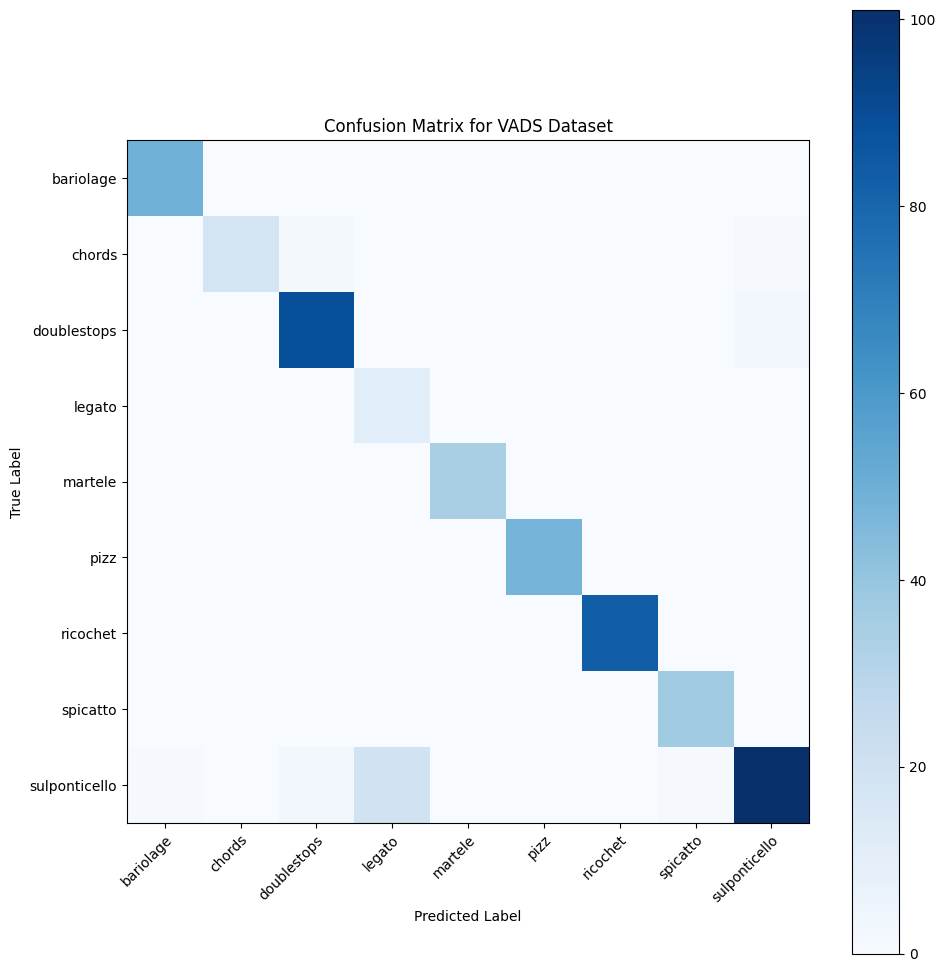

In [ ]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust figure size as needed
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set labels, title, and ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=pipe.model.config.id2label.values(),
       yticklabels=pipe.model.config.id2label.values(),
       title="Confusion Matrix for VADS Dataset",
       ylabel="True Label",
       xlabel="Predicted Label")

# Rotate x-axis labels for better readability
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Display the plot
plt.tight_layout()
plt.show()